In [1]:
import pandas as pd
get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
from numpy import *

In [2]:
user_data = pd.read_csv('/home/sysadmin/zhicongchen/DataSets/phone_data/phone_data/tb_user_info_201202.csv')

In [2]:
sms_data = pd.read_csv('/home/sysadmin/zhicongchen/DataSets/phone_data/phone_data/tb_sms_201202.csv')
call_data = pd.read_csv('/home/sysadmin/zhicongchen/DataSets/phone_data/phone_data/tb_call_201202.csv')

In [4]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382779 entries, 0 to 382778
Data columns (total 25 columns):
ACC_NBR            382779 non-null int64
URBAN_RURAL_ID     382779 non-null int64
CERTI_LATN         382779 non-null int64
GENDER             334083 non-null object
AGE                334126 non-null float64
CUST_LEVEL         382779 non-null int64
CUST_WORK_TYPE     379228 non-null float64
OS_TYPE            363964 non-null object
TERMINAL_PRICE     363964 non-null float64
INNET_DATE         382779 non-null object
IS_3G              382779 non-null int64
IS_VIP             382779 non-null int64
PROB_LEVEL         376175 non-null float64
CONSUME_AMT        382779 non-null float64
WEB_FEE            382779 non-null float64
LOCAL_CALL_FEE     382779 non-null float64
LONG_CALL_FEE      382779 non-null float64
ROAM_CALL_FEE      382779 non-null float64
CALL_FEE           382779 non-null float64
VALUE_ADDED_FEE    382779 non-null float64
SMS_FEE            382779 non-null float64
S

#power law

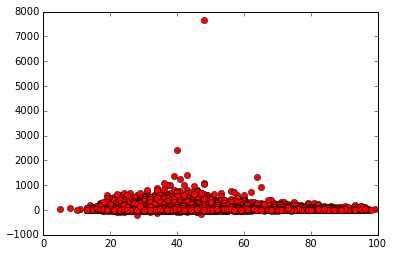

In [24]:
# subdata = data[['TERMINAL_PRICE','CUST_LEVEL','CUST_WORK_TYPE','PROB_LEVEL','CONSUME_AMT','WEB_FEE','LOCAL_CALL_FEE','LONG_CALL_FEE','ROAM_CALL_FEE','CALL_FEE','VALUE_ADDED_FEE','SMS_FEE','INNET_FLOAT_AMT','INNET_DUR']]
X = 'AGE'
Y = 'CONSUME_AMT'
subdata = user_data[[X, Y]].fillna(0)
subdata = subdata[subdata.AGE < 100][subdata.AGE > 0]
#fig = plt.figure(figsize=(12, 4),facecolor='white')
#ax = fig.add_subplot(1,3,1)
plt.plot(subdata[X], subdata[Y], 'ro')
#plt.xscale('log'); plt.yscale('log')
#plt.xlabel(r'CALL_FEE'), plt.ylabel(r'SMS_FEE')
plt.show()

In [17]:
user_data.loc[0 ,'WEB_FEE':'SMS_FEE'].sum()

185.40000000000001

In [33]:
user_data.loc[0,'CONSUME_AMT']

100.09999999999999

In [ ]:
subdata[subdata.AGE > 0].groupby('AGE').CONSUME_AMT.nunique()

In [75]:
consume_data = subdata['CONSUME_AMT'][subdata.CONSUME_AMT > 0]
uniquearr = consume_data.unique()
countarr = map(lambda x: consume_data[consume_data == uniquearr[x]].count(), range(0,len(uniquearr)))

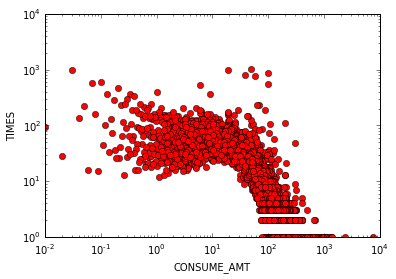

In [79]:
plt.plot(uniquearr, countarr, 'ro')
plt.xscale('log'); plt.yscale('log')
plt.xlabel(r'CONSUME_AMT'), plt.ylabel(r'TIMES')
plt.show()

#linear regression

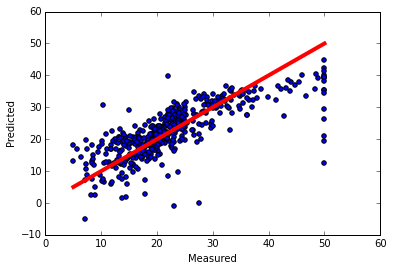

In [8]:
from sklearn import datasets
from sklearn.cross_validation import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
boston = datasets.load_boston()
y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validated:
predicted = cross_val_predict(lr, boston.data, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r-', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

('Coefficients: \n', array([[ 1.03866108,  0.        ],
       [ 0.        ,  0.        ]]))
Residual sum of squares: 75.07
Variance score: 0.93


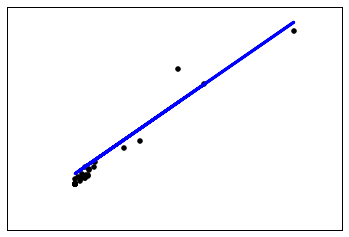

In [5]:
from sklearn import datasets
from sklearn.cross_validation import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

# Load the diabetes dataset
#diabetes = datasets.load_diabetes()

# Use only one feature
#diabetes_X = diabetes.data[:, np.newaxis, 2]
X = user_data.CALL_FEE.fillna(0).tolist()
y = user_data.CONSUME_AMT.fillna(0).tolist()
X = map(lambda x: (x,1), X)
y = map(lambda x: (x,1), y)

# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, regr.predict(X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [62]:
from sklearn import datasets
from sklearn.cross_validation import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

# Load the diabetes dataset
#diabetes = datasets.load_diabetes()

# Use only one feature
#diabetes_X = diabetes.data[:, np.newaxis, 2]
X = [user_data.SMS_FEE.fillna(0).tolist(),user_data.CALL_FEE.fillna(0).tolist()]
y = user_data.CONSUME_AMT.tolist()
y = map(lambda x: (x,1), y)

# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, regr.predict(X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

ValueError: Found arrays with inconsistent numbers of samples: [     2 382779]